In [ ]:
from random import choices
import numpy as np
from random import getrandbits
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Codificador

class Codificador:
    def __init__(self, info, G):
        self.G = G
        self.info = info
        self.codigo = []

    def cod(self):
        self.codigo = np.dot(np.array(self.info), self.G)
        for i in range(len(self.codigo)):
            self.codigo[i] = self.codigo[i] % 2
        return self.codigo

    def get_codigo(self):
        return self.codigo

    def get_info(self):
        return self.info

In [ ]:
#CanalBSC

class CanalBSC:
    def __init__(self, entrada, probErro):
        self.entrada = entrada
        self.saida = []
        self.probErro = probErro

    def transmitir(self):
        acertou = [True, False]
        prob = [1 - self.probErro, self.probErro]
        for i in self.entrada:
            aux = choices(acertou, weights=prob, k=1)
            if aux[0]:
                self.saida.append(i)
            else:
                if i == 1:
                    self.saida.append(0)
                else:
                    self.saida.append(1)
        return self.saida

In [ ]:
#Decodificador

class Decodificador:
    def __init__(self, recebida, H):
        self.H = H
        self.recebida = recebida
        self.estimada = []
        self.erro = []

    def calcular_erro(self):
        s = np.dot(np.array(self.recebida), self.H)
        for i in range(len(s)):
            s[i] = s[i] % 2

        if np.array_equal(np.array([0,0,0]),s):
            return np.zeros((len(self.recebida),), dtype=int)
        else:
            e = []

            for i in range(len(self.recebida)):
                if np.array_equal(self.H[i],s):

                    e.append(1)
                else:
                    e.append(0)

            return e
    
    def calcular_estimada(self):
      e = self.calcular_erro()
      r = self.recebida
      for i in range(len(e)):
        self.estimada.append((e[i]+r[i])%2)

      return self.estimada

In [ ]:
#CONSTANTES 
#Matrizes G e H Hamming
H_H = np.array([[1, 0, 1],
                [1, 1, 0],
                [1, 1, 1],
                [0, 1, 1],
                [1, 0, 0],
                [0, 1, 0],
                [0, 0, 1]])

G_H = np.array([[1, 0, 0, 0, 1, 0, 1],
                [0, 1, 0, 0, 1, 1, 0],
                [0, 0, 1, 0, 1, 1, 1],
                [0, 0, 0, 1, 0, 1, 1]])


#Matriz G e H Codigo Alunos info 9
H_SF9 = np.array([[1, 0, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0],
                  [1, 0, 0, 0, 0, 1],
                  [0, 1, 0, 1, 0, 0],
                  [0, 1, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 1],
                  [0, 0, 1, 1, 0, 0],
                  [0, 0, 1, 0, 1, 0],
                  [0, 0, 1, 0, 0, 1],
                  [1, 0, 0, 0, 0, 0],
                  [0, 1, 0, 0, 0, 0],
                  [0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 1, 0, 0],
                  [0, 0, 0, 0, 1, 0],
                  [0, 0, 0, 0, 0, 1]])

G_SF9 = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
                  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]])

#Matriz G e H Codigo Alunos info 15
H_SF15 = np.array([[1, 0, 0, 0, 0, 1, 0, 0],
                   [1, 0, 0, 0, 0, 0, 1, 0],
                   [1, 0, 0, 0, 0, 0, 0, 1],
                   [0, 1, 0, 0, 0, 1, 0, 0],
                   [0, 1, 0, 0, 0, 0, 1, 0],
                   [0, 1, 0, 0, 0, 0, 0, 1],
                   [0, 0, 1, 0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0, 0, 1, 0],
                   [0, 0, 1, 0, 0, 0, 0, 1],
                   [0, 0, 0, 1, 0, 1, 0, 0],
                   [0, 0, 0, 1, 0, 0, 1, 0],
                   [0, 0, 0, 1, 0, 0, 0, 1],
                   [0, 0, 0, 0, 1, 1, 0, 0],
                   [0, 0, 0, 0, 1, 0, 1, 0],
                   [0, 0, 0, 0, 1, 0, 0, 1],
                   [1, 0, 0, 0, 0, 0, 0, 0],
                   [0, 1, 0, 0, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0, 0, 0, 0],
                   [0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0, 0],
                   [0, 0, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 1, 0],
                   [0, 0, 0, 0, 0, 0, 0, 1]])

G_SF15 = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
                   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
                   [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
                   [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
                   [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
                   [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]])

#Matriz G e H Codigo Alunos info 16
H_SF16 = np.array([[1, 0, 0, 0, 1, 0, 0, 0],
                   [1, 0, 0, 0, 0, 1, 0, 0],
                   [1, 0, 0, 0, 0, 0, 1, 0],
                   [1, 0, 0, 0, 0, 0, 0, 1],
                   [0, 1, 0, 0, 1, 0, 0, 0],
                   [0, 1, 0, 0, 0, 1, 0, 0],
                   [0, 1, 0, 0, 0, 0, 1, 0],
                   [0, 1, 0, 0, 0, 0, 0, 1],
                   [0, 0, 1, 0, 1, 0, 0, 0],
                   [0, 0, 1, 0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0, 0, 1, 0],
                   [0, 0, 1, 0, 0, 0, 0, 1],
                   [0, 0, 0, 1, 1, 0, 0, 0],
                   [0, 0, 0, 1, 0, 1, 0, 0],
                   [0, 0, 0, 1, 0, 0, 1, 0],
                   [0, 0, 0, 1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 0, 0, 0, 0],
                   [0, 1, 0, 0, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0, 0, 0, 0],
                   [0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0, 0],
                   [0, 0, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 1, 0],
                   [0, 0, 0, 0, 0, 0, 0, 1]])

G_SF16 = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
                   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
                   [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
                   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                   [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
                   [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
                   [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]])

PROB_P = [0.5, 0.2, 0.1, 0.05, 0.02, 0.001, 0.0005, 0.0002, 0.0001, 0.00005, 0.00002, 0.00001, 0.000005, 0.000002,
          0.000001]




REPETICAO = 100000
TAM_INFO = 4
TAM_INFO_SF9 = 9
TAM_INFO_SF15 = 15
TAM_INFO_SF16 = 16


In [ ]:
Pb = []
Pb_sc = []
Pb_SF9 = []
Pb_SF15 = []
Pb_SF16 = []
 
for k in PROB_P:
  print(k)
  soma_erro = 0
  soma_erro_sc = 0
  soma_erro_SF9 = 0
  soma_erro_SF15 = 0
  soma_erro_SF16 = 0
  
  for i in range(REPETICAO):
    
    info = []
    for j in range(TAM_INFO):
        info.append(getrandbits(1))

    #Hamming
    transmistida_H = Codificador(info, G_H).cod()
    recebida_H = CanalBSC(transmistida_H, k).transmitir()
    estimada_H = Decodificador(recebida_H, H_H).calcular_estimada()
    
    for i in range(len(info)):
      if estimada_H[i] != transmistida_H[i]:
        soma_erro = soma_erro + 1

    

    #sem codificação
    transmitida_sc = info
    recebida_sc = CanalBSC(transmitida_sc, k).transmitir()
    
    for i in range(len(recebida_sc)):
      if recebida_sc[i] != transmitida_sc[i]:
        soma_erro_sc = soma_erro_sc + 1

  Pb.append(soma_erro/(REPETICAO*len(info)))
  Pb_sc.append(soma_erro_sc /(REPETICAO*len(recebida_sc))) 

  #Cod Alunos SF9
  for i in range(REPETICAO):
    info_SF9 = []
    for j in range(TAM_INFO_SF9):
        info_SF9.append(getrandbits(1))
    
    transmistida_SF9 = Codificador(info_SF9, G_SF9).cod()
    recebida_SF9 = CanalBSC(transmistida_SF9, k).transmitir()
    estimada_SF9 = Decodificador(recebida_SF9, H_SF9).calcular_estimada()

    for i in range(len(info_SF9)):
      if estimada_SF9[i] != transmistida_SF9[i]:
        soma_erro_SF9 = soma_erro_SF9 + 1

  Pb_SF9.append(soma_erro_SF9 /(REPETICAO*len(info_SF9))) 
  
  #Cod Alunos SF15
  for i in range(REPETICAO):
    info_SF15 = []
    for j in range(TAM_INFO_SF15):
        info_SF15.append(getrandbits(1))
    
    transmistida_SF15 = Codificador(info_SF15, G_SF15).cod()
    recebida_SF15 = CanalBSC(transmistida_SF15, k).transmitir()
    estimada_SF15 = Decodificador(recebida_SF15, H_SF15).calcular_estimada()

    for i in range(len(info_SF15)):
      if estimada_SF15[i] != transmistida_SF15[i]:
        soma_erro_SF15 = soma_erro_SF15 + 1

  Pb_SF15.append(soma_erro_SF15 /(REPETICAO*len(info_SF15))) 

  #Cod Alunos SF16
  for i in range(REPETICAO):
    info_SF16 = []
    for j in range(TAM_INFO_SF16):
        info_SF16.append(getrandbits(1))
    
    transmistida_SF16 = Codificador(info_SF16, G_SF16).cod()
    recebida_SF16 = CanalBSC(transmistida_SF16, k).transmitir()
    estimada_SF16 = Decodificador(recebida_SF16, H_SF16).calcular_estimada()

    for i in range(len(info_SF16)):
      if estimada_SF16[i] != transmistida_SF16[i]:
        soma_erro_SF16 = soma_erro_SF16 + 1

  Pb_SF16.append(soma_erro_SF16 /(REPETICAO*len(info_SF16)))

print(Pb)
print(Pb_sc)
print(Pb_SF9)
print(Pb_SF15)
print(Pb_SF16)

0.5
0.2
0.1
0.05
0.02
0.001
0.0005
0.0002
0.0001
5e-05
2e-05
1e-05
5e-06
2e-06
1e-06
[0.499681, 0.196391, 0.066747, 0.019238, 0.003404, 1.3e-05, 2e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.500456, 0.200621, 0.100117, 0.049727, 0.019884, 0.001014, 0.00048, 0.000198, 0.000108, 5.1e-05, 2.9e-05, 1.1e-05, 2e-06, 3e-06, 1e-06]
[0.49992444444444445, 0.19948355555555555, 0.08208933333333333, 0.027496444444444445, 0.005276444444444445, 1.6e-05, 2.222222222222222e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.500102, 0.20118733333333333, 0.092956, 0.035409333333333334, 0.007397333333333333, 2.4e-05, 8e-06, 4e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.50028375, 0.201090625, 0.0937625, 0.036116875, 0.0076975, 1.5625e-05, 6.875e-06, 2.5e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
Resul_H = []
Resul_SC = []
Resul_SF9 = []


for i in range(len(Pb)):
  Resul_H.append(Pb[i])
  Resul_SC.append(Pb_sc[i])
  Resul_SF9.append(Pb_SF9[i])



In [ ]:
Resul_SF15 = []
Resul_SF16 = []

for i in range(len(Pb)):
  Resul_SF15.append(Pb_SF15[i])
  Resul_SF16.append(Pb_SF16[i])

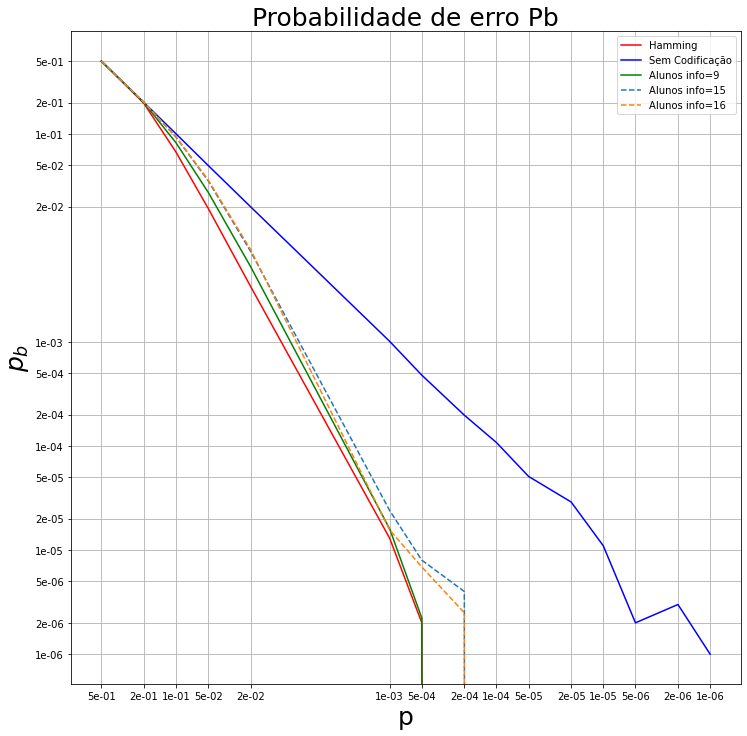

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


x = PROB_P
y = Resul_H
y2 = Resul_SC
y3 = Resul_SF9
y4 = Resul_SF15
y5 = Resul_SF16


fig, ax = plt.subplots(figsize = (12,12))
ax.plot(x, y, '-r', label='Hamming')
ax.plot(x, y2, '-b', label='Sem Codificação')
ax.plot(x, y3, '-g', label='Alunos info=9')
ax.plot(x, y4, '--', label='Alunos info=15')
ax.plot(x, y5, '--', label='Alunos info=16')

ax.invert_xaxis()
plt.loglog(basex=2,basey=2)

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(FormatStrFormatter("%.e"))
ax.set_yticks(x)
ax.set_xticks(x)

#ax.legend(['Sem código', 'Código de Hamming', 'Código próprio'])
ax.set_title("Probabilidade de erro Pb",fontsize=25)
ax.set_xlabel("p",fontsize=25)
ax.set_ylabel("$p_b$",fontsize=25)

leg = ax.legend();
ax.grid()

